In [1]:
try:
    from IPython import get_ipython
    get_ipython().magic('reset -f')  
except:
    pass
from IPython import get_ipython
ipython = get_ipython().magic
import io
import os
import sys
os.chdir('/Users/markprosser/Desktop/PythonScripts')
import MCP_functions as MCP
import numpy as np
import matplotlib.pyplot as plt
import pickle
plt.close("all")

import pandas as pd
import savReaderWriter as spss
import scipy.stats as stats
import statsmodels.api as sm
import pylab

/Users/markprosser/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
savFileName = '/Users/markprosser/Desktop/PythonScripts/Input_needed_by/Stats_msc_year2/Stats_7.sav'
with spss.SavReader(savFileName) as reader:
    records = reader.all()
df1 = pd.DataFrame(records)

In [3]:
df1.head()

,0,1,2,3,4
0,1.0,2.0,1.0,28.0,43.0
1,2.0,2.0,1.0,31.0,46.0
2,2.0,2.0,1.0,34.0,39.0
3,2.0,2.0,2.0,34.0,45.0
4,2.0,2.0,1.0,34.0,41.0


In [4]:
df1.columns = ['age', 'sex', 'science_student', 'env1', 'env2']
df1.head()

,age,sex,science_student,env1,env2
0,1.0,2.0,1.0,28.0,43.0
1,2.0,2.0,1.0,31.0,46.0
2,2.0,2.0,1.0,34.0,39.0
3,2.0,2.0,2.0,34.0,45.0
4,2.0,2.0,1.0,34.0,41.0


In [5]:
df2 = pd.DataFrame.copy(df1)
df2.age.replace([1, 2], ['under20', 'over20'],  inplace=True)
df2.sex.replace([1, 2], ['female', 'male'],  inplace=True)
df2.science_student.replace([1, 2], ['bumke', 'rike'],  inplace=True)
df2.head()

,age,sex,science_student,env1,env2
0,under20,male,bumke,28.0,43.0
1,over20,male,bumke,31.0,46.0
2,over20,male,bumke,34.0,39.0
3,over20,male,rike,34.0,45.0
4,over20,male,bumke,34.0,41.0


In [6]:
#7_1
df2.groupby(['sex']).mean()

,env1,env2
sex,,
female,54.292929,55.141414
male,50.029703,51.564356


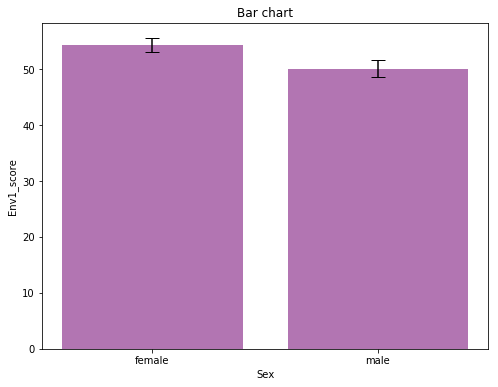

In [7]:
plt.figure(1, figsize=(8, 6));

# Make a fake dataset:
height = df2.groupby('sex')['env1'].mean().tolist()
bars = df2.groupby('sex')['env1'].mean().index.tolist()
y_pos = np.arange(len(bars))
 
stdev = df2.groupby('sex')['env1'].std().tolist()
error_bars = (stdev / (df2.env1.count()**0.5)) * 1.96
    
# Create bars
plt.bar(y_pos, height, color = (0.5,0.1,0.5,0.6), yerr=error_bars, capsize=7)

plt.title('Bar chart')
plt.xlabel('Sex')
plt.ylabel('Env1_score')
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

In [8]:
#7_2

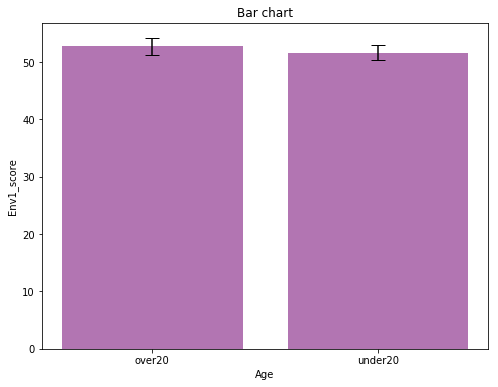

In [9]:
plt.figure(2, figsize=(8, 6));

# Make a fake dataset:
height = df2.groupby('age')['env1'].mean().tolist()
bars = df2.groupby('age')['env1'].mean().index.tolist()
y_pos = np.arange(len(bars))
 
stdev = df2.groupby('age')['env1'].std().tolist()
error_bars = (stdev / (df2.env1.count()**0.5)) * 1.96
    
# Create bars
plt.bar(y_pos, height, color = (0.5,0.1,0.5,0.6), yerr=error_bars, capsize=7)

plt.title('Bar chart')
plt.xlabel('Age')
plt.ylabel('Env1_score')
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

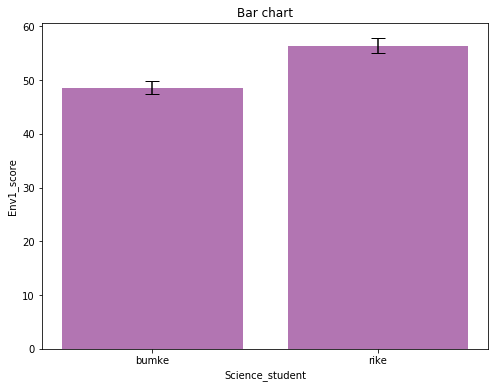

In [10]:
plt.figure(3, figsize=(8, 6));

# Make a fake dataset:
height = df2.groupby('science_student')['env1'].mean().tolist()
bars = df2.groupby('science_student')['env1'].mean().index.tolist()
y_pos = np.arange(len(bars))
 
stdev = df2.groupby('science_student')['env1'].std().tolist()
error_bars = (stdev / (df2.env1.count()**0.5)) * 1.96
    
# Create bars
plt.bar(y_pos, height, color = (0.5,0.1,0.5,0.6), yerr=error_bars, capsize=7)

plt.title('Bar chart')
plt.xlabel('Science_student')
plt.ylabel('Env1_score')
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

In [11]:
#7_3

In [12]:
# import csv
# with open('/Volumes/SD/LIST1', 'w', newline='') as myfile:
#     wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
#     wr.writerow(rike)

rike = df2[df2['science_student']=='rike']['env1']
bumke= df2[df2['science_student']=='bumke']['env1']
stats.ttest_ind(rike, bumke, axis=0, equal_var=True, nan_policy='propagate') #2tailed. The one-tail P value is half the two-tail P value.

Ttest_indResult(statistic=5.826027359291194, pvalue=2.2682872019046873e-08)

In [13]:
#7_4

In [14]:
stats.levene(rike, bumke, center='mean')

LeveneResult(statistic=1.2527823789500241, pvalue=0.26437769484370288)

In [15]:
fem = df2[df2['sex']=='female']['env1']
male = df2[df2['sex']=='male']['env1']
stats.ttest_ind(fem, male, axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=3.0136890122274642, pvalue=0.0029182900926526881)

In [16]:
#7_6

In [17]:
print('Mean of ENV1 is:')
print(df2['env1'].mean())
print('')
print('Median of ENV1 is:')
print(df2['env1'].median())
print('')
print('Mode of ENV1 is:')
print(df2['env1'].mode())
print('')
stdev = df2['env1'].std()
standard_error = (stdev / (df2.env1.count()**0.5)) * 1.96
print('Standard Error of ENV1 is:')
print(standard_error)

Mean of ENV1 is:
52.14

Median of ENV1 is:
50.0

Mode of ENV1 is:
0    47.0
dtype: float64

Standard Error of ENV1 is:
1.41412984527


In [18]:
print('Mean of ENV2 is:')
print(df2['env2'].mean())
print('')
print('Median of ENV2 is:')
print(df2['env2'].median())
print('')
print('Mode of ENV2 is:')
print(df2['env2'].mode())
print('')
stdev = df2['env2'].std()
standard_error = (stdev / (df2.env1.count()**0.5)) * 1.96
print('Standard Error of ENV2 is:')
print(standard_error)

Mean of ENV2 is:
53.335

Median of ENV2 is:
53.5

Mode of ENV2 is:
0    54.0
1    57.0
dtype: float64

Standard Error of ENV2 is:
1.33298230722


In [19]:
#7_7

In [20]:
env1_scores = df2['env1']
env2_scores = df2['env2']
stats.ttest_rel(env1_scores, env2_scores, axis=0)

Ttest_relResult(statistic=-2.221428352276718, pvalue=0.027449009265019714)

In [21]:
#7_8

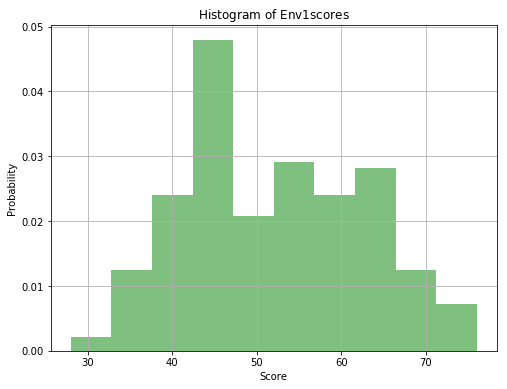

In [22]:
x = df2['env1'].dropna().tolist()
plt.figure(4, figsize=(8, 6));
n, bins, patches = plt.hist(x, 10, normed=1, facecolor='green', alpha=0.5)
plt.xlabel('Score')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Env1 scores}$')
plt.grid(True)
plt.show()

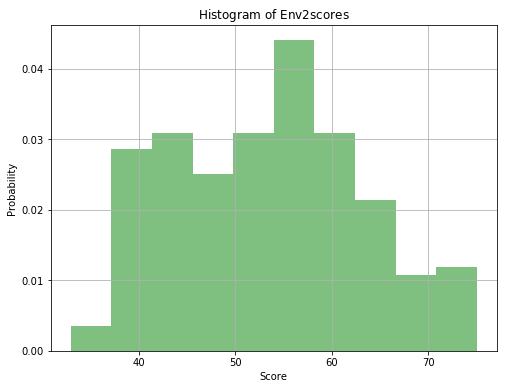

In [23]:
x = df2['env2'].dropna().tolist()
plt.figure(5, figsize=(8, 6));
n, bins, patches = plt.hist(x, 10, normed=1, facecolor='green', alpha=0.5)
plt.xlabel('Score')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Env2 scores}$')
plt.grid(True)
plt.show()

In [24]:
#7_9

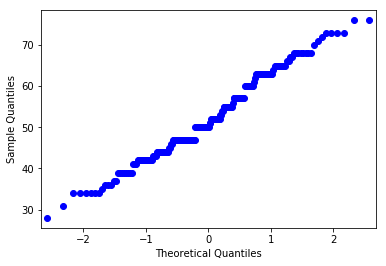

In [25]:
sm.qqplot(df2['env1'])#, line='r')
pylab.show()

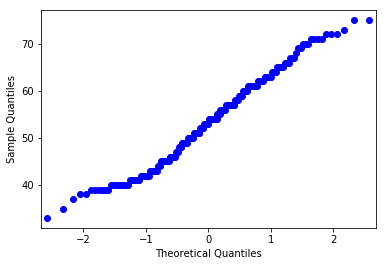

In [26]:
sm.qqplot(df2['env2'])#, line='r')
pylab.show()

In [27]:
#7_10

In [28]:
#Kolmogorov-Smirnov
stats.kstest(df2['env1'].tolist(), 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [29]:
#Kolmogorov-Smirnov
stats.kstest(df2['env2'], 'norm', N=20, alternative='two-sided', mode='approx')

KstestResult(statistic=1.0, pvalue=0.0)

In [30]:
#7_11

In [31]:
stats.shapiro(df2['env1'], a=None, reta=False)

(0.9806275367736816, 0.0073057617992162704)

In [32]:
stats.shapiro(df2['env2'], a=None, reta=False)

(0.976353108882904, 0.0018621913623064756)

In [33]:
#7_12

In [34]:
stats.mannwhitneyu(df2[df2['science_student']=='rike']['env1'], df2[df2['science_student']=='bumke']['env1'], \
                   use_continuity=True, alternative=None)

MannwhitneyuResult(statistic=2692.0, pvalue=1.3668492175300268e-08)

In [35]:
#7_13

In [36]:
stats.mannwhitneyu(df2[df2['sex']=='female']['env1'], df2[df2['sex']=='male']['env1'], \
                   use_continuity=True, alternative=None)

MannwhitneyuResult(statistic=3803.5, pvalue=0.0017026342602475481)

In [37]:
#7_14

In [38]:
stats.wilcoxon(df2['env1'], df2['env2'], zero_method='wilcox')

WilcoxonResult(statistic=7377.5, pvalue=0.010627109993796879)